In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,auc,roc_curve,precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.shape

(569, 32)

In [7]:
df.index

RangeIndex(start=0, stop=569, step=1)

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

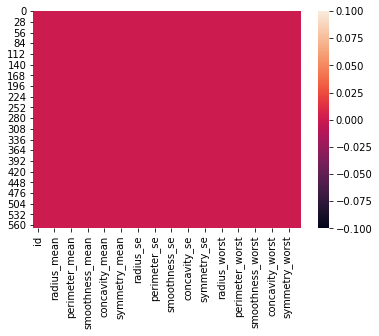

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop('id',axis =1, inplace = True)

In [12]:
df.sample(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
513,B,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,...,16.76,17.24,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048
288,B,11.260,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,...,11.86,22.33,78.27,437.6,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009
462,B,14.400,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,...,15.40,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464
196,M,13.770,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,...,16.39,34.01,111.60,806.9,0.17370,0.31220,0.38090,0.16730,0.3080,0.09333
195,B,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,13.88,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
245,B,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748
55,B,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,...,12.84,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036
520,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,10.57,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
188,B,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576


In [13]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [14]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
433,1,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,...,22.66,30.93,145.30,1603.0,0.13900,0.3463,0.39120,0.17080,0.3007,0.08314
324,0,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,...,13.75,21.38,91.11,583.1,0.12560,0.1928,0.11670,0.05556,0.2661,0.07961
146,1,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,13.74,26.38,91.93,591.7,0.13850,0.4092,0.45040,0.18650,0.5774,0.10300
29,1,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,...,20.01,19.52,134.90,1227.0,0.12550,0.2812,0.24890,0.14560,0.2756,0.07919
267,0,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.10050,0.1730,0.14530,0.06189,0.2446,0.07024
222,0,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,...,11.17,22.84,71.94,375.6,0.14060,0.1440,0.06572,0.05575,0.3055,0.08797
248,0,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.25,35.19,77.98,455.7,0.14990,0.1398,0.11250,0.06136,0.3409,0.08147
106,0,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.14,29.26,85.51,521.7,0.16880,0.2660,0.28730,0.12180,0.2806,0.09097
112,0,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,0.1704,...,15.30,23.73,107.00,709.0,0.08949,0.4193,0.67830,0.15050,0.2398,0.10820
148,0,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,...,15.85,19.85,108.60,766.9,0.13160,0.2735,0.31030,0.15990,0.2691,0.07683


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

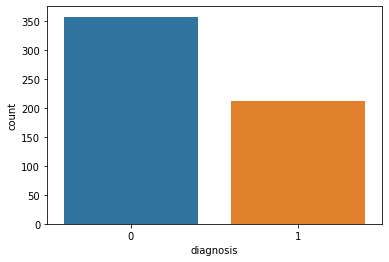

In [15]:
sns.countplot(df.diagnosis)

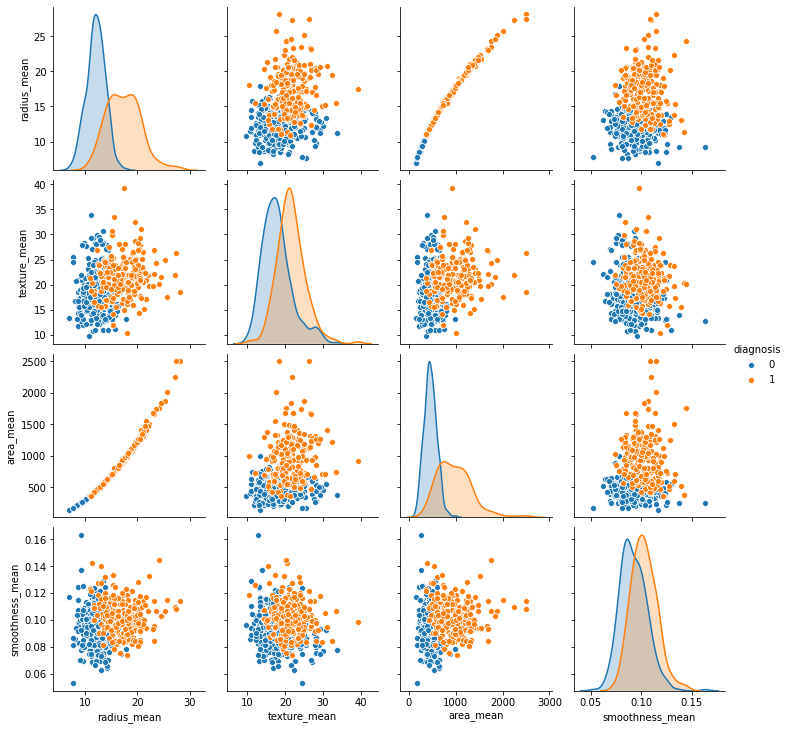

In [16]:
sns.pairplot(df,vars=['radius_mean','texture_mean','area_mean','smoothness_mean'],hue='diagnosis')

In [17]:
y = df.diagnosis
x = df.drop('diagnosis',axis = True)

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)
xtrain.shape,ytrain.shape

((398, 30), (398,))

In [19]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

LOGISTIC REGRESSION

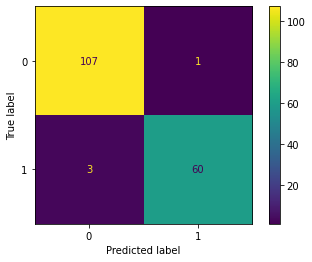

In [20]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lrpred  = lr.predict(xtest)
LR = accuracy_score(ytest,lrpred)
plot_confusion_matrix(lr,xtest,ytest)
plt.show()

GAUSSIAN NAIVE-BAYES CLASSIFIER

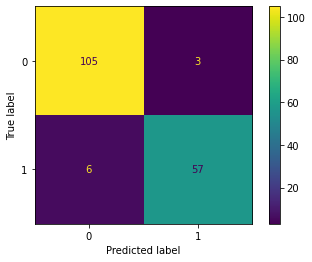

In [21]:
gaussiannb = GaussianNB()
gaussiannb.fit(xtrain,ytrain)
gaussiannbpred = gaussiannb.predict(xtest)
GNB = accuracy_score(ytest,gaussiannbpred)
plot_confusion_matrix(gaussiannb,xtest,ytest)

DECISON TREE CLASSIFIER

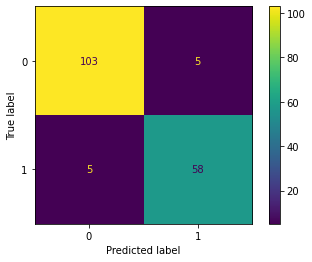

In [22]:
dtree = DecisionTreeClassifier(criterion = 'gini')
dtree.fit(xtrain,ytrain)
dtreepred = dtree.predict(xtest)
DTREE = accuracy_score(ytest,dtreepred)
plot_confusion_matrix(dtree,xtest,ytest)     

RANDOM FOREST CLASSIFIER

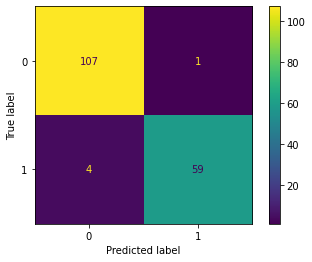

In [23]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(xtrain,ytrain)
rfcpred = rfc.predict(xtest)
RFC = accuracy_score(ytest,rfcpred)
plot_confusion_matrix(rfc,xtest,ytest) 

NEAREST NEIGHBOR CLASSIFIER

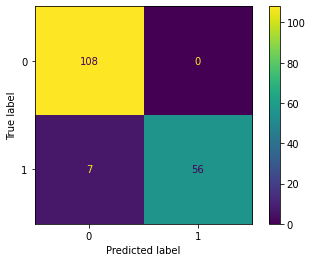

In [24]:
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(xtrain,ytrain)
knnpred = knn.predict(xtest)
KNN = accuracy_score(ytest,knnpred)
plot_confusion_matrix(knn,xtest,ytest)

GRADIENT BOOSTING CLASSIFIER

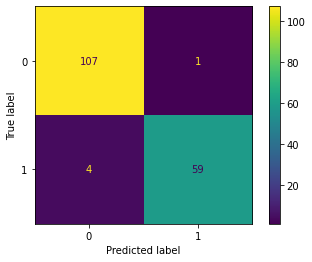

In [25]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
gbcpred = gbc.predict(xtest)
GBC = accuracy_score(ytest,gbcpred)
plot_confusion_matrix(gbc,xtest,ytest)

EXTREME GRADIENT BOOSTING CLASSIFIER

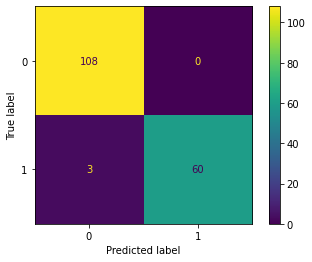

In [26]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
xgbpred = xgb.predict(xtest)
XGB = accuracy_score(ytest,xgbpred)
plot_confusion_matrix(xgb,xtest,ytest)

In [27]:
models = pd.DataFrame({
    'Models': ['Logistic Regression','Random Forest Classifier', 'Decision Tree Classifier','K-Nearest Neighbors', 'Gaussion Naive Bayes','Gradient Boosting Classifier','XGBoost'],
    'Accuracy-Score': [LR,RFC,DTREE,KNN,GNB,GBC,XGB]})


In [28]:
models.sort_values(by='Accuracy-Score',ascending = False)

,Models,Accuracy-Score
6,XGBoost,0.982456
0,Logistic Regression,0.976608
1,Random Forest Classifier,0.970760
5,Gradient Boosting Classifier,0.970760
3,K-Nearest Neighbors,0.959064
4,Gaussion Naive Bayes,0.947368
2,Decision Tree Classifier,0.941520


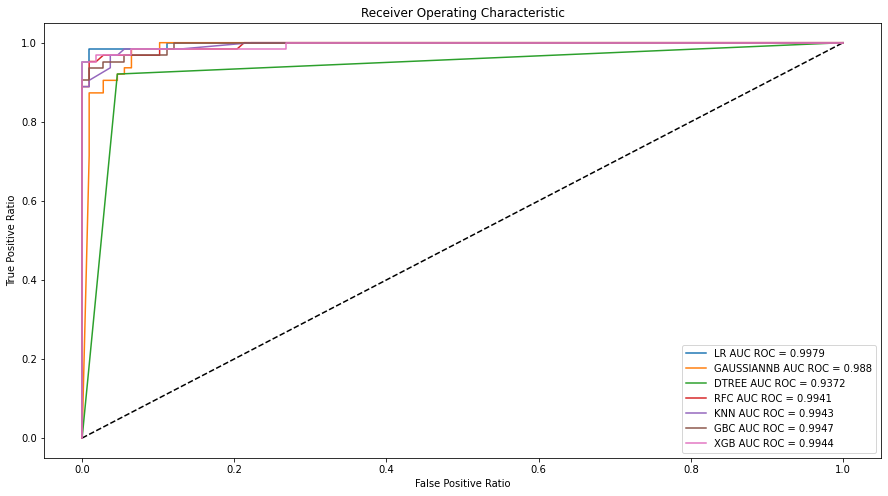

In [29]:
plt.figure(0, figsize =(15, 8)).clf()
y_pred_prob1 = lr.predict_proba(xtest)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(ytest, y_pred_prob1)

y_pred_prob2 = gaussiannb.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(ytest, y_pred_prob2)


y_pred_prob3 = dtree.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(ytest, y_pred_prob3)

y_pred_prob4 = rfc.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(ytest, y_pred_prob4)

y_pred_prob6 = knn.predict_proba(xtest)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(ytest, y_pred_prob6)

y_pred_prob7 = gbc.predict_proba(xtest)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(ytest, y_pred_prob7)

y_pred_prob8 = xgb.predict_proba(xtest)[:,1]
fpr8 , tpr8, thresholds8 = roc_curve(ytest, y_pred_prob8)


lr_roc_auc = roc_auc_score(ytest, lr.predict_proba(xtest)[:,1])
gaussiannb_roc_auc = roc_auc_score(ytest, gaussiannb.predict_proba(xtest)[:,1])
dtree_roc_auc = roc_auc_score(ytest, dtree.predict_proba(xtest)[:,1])
rfc_roc_auc = roc_auc_score(ytest, rfc.predict_proba(xtest)[:,1])
knn_roc_auc = roc_auc_score(ytest, knn.predict_proba(xtest)[:,1])
gbc_roc_auc = roc_auc_score(ytest, gbc.predict_proba(xtest)[:,1])
xgb_roc_auc = roc_auc_score(ytest, xgb.predict_proba(xtest)[:,1])


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"LR AUC ROC = {round(lr_roc_auc, 4)}")
plt.plot(fpr2, tpr2, label= f"GAUSSIANNB AUC ROC = {round(gaussiannb_roc_auc, 4)}")
plt.plot(fpr3, tpr3, label= f"DTREE AUC ROC = {round(dtree_roc_auc, 4)}")
plt.plot(fpr4, tpr4, label= f"RFC AUC ROC = {round(rfc_roc_auc, 4)}")
plt.plot(fpr6, tpr6, label= f"KNN AUC ROC = {round(knn_roc_auc, 4)}")
plt.plot(fpr7, tpr7, label= f"GBC AUC ROC = {round(gbc_roc_auc, 4)}")
plt.plot(fpr8, tpr8, label= f"XGB AUC ROC = {round(xgb_roc_auc, 4)}")
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('Receiver Operating Characteristic')
plt.show()
